In [5]:
import matplotlib.pyplot as plt
from math import log, log10
import numpy as np

# Métodos para Encontrar Raízes

> f(x) = x.log<sub>10</sub>(x) - 1

> f'(x) = log<sub>10</sub>x + ln(10)<sup>-1</sup>

In [3]:
def f(x):
    return x * log10(x) - 1
def der_f(x):
    return log10(x) + log(10) ** -1

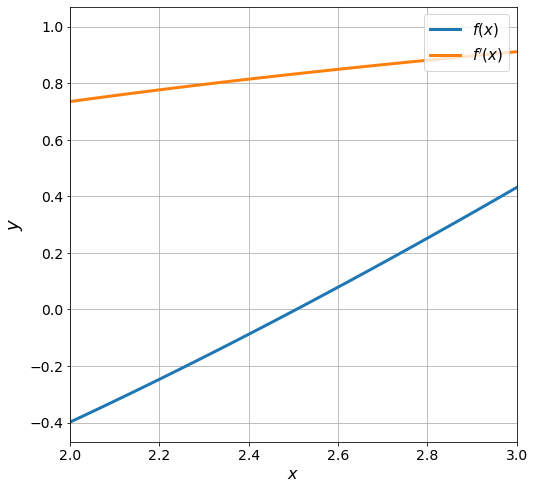

In [6]:
# Realizando plot 
# Convertendo respostas para numpy
x_num, y_num = 1, 1
#beta_num = np.array(solution).astype(float).flatten()

# Gerando a malha (grid)
x_min, x_max = 2, 3
x_grid = np.linspace(x_min, x_max, 40)

# Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
f_grid, d_grid = [], []
for x in x_grid:
    f_grid.append(x * log10(x) - 1)
    d_grid.append(log10(x) + log(10) ** -1)
    
# Instruções do plot
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_grid, f_grid, linewidth = 3) # reta
ax.plot(x_grid, d_grid, linewidth = 3) # reta
ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

# Labels nos eixos, limites do plot e legenda
ax.set_xlabel("$x$", size = 16)
ax.set_ylabel("$y$", size = 18)
ax.set_xlim(x_min, x_max)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(["$f(x)$", "$f'(x)$"], loc = "upper right", fontsize = 15)
ax.grid(True)

plt.show()

In [21]:
a, b = 2, 3
ε = 1e-7
saida = "iterações: {0}\nx: {1}\ny: {2}"

### Bissecção

In [33]:
def bissecção(a, b, ε, iteracoes=0):
    x = (a + b) / 2
    y = f(x)
    iteracoes += 1
    if abs(y) < ε:
        return x, abs(y), iteracoes
    if f(a) * y > 0:
        return bissecção(x, b, ε, iteracoes)
    else:
        return bissecção(a, x, ε, iteracoes)
        

In [34]:
x, y, iteracoes = bissecção(a, b, ε)
print(saida.format(iteracoes, x, y))

iterações: 21
x: 2.5061841011047363
y: 3.7068876412860163e-08


### Método da Falsa Posição

In [35]:
def falsa_posição(a, b, ε, iteracoes=0):
    f_a, f_b = f(a), f(b)
    x = (a * f_b - b * f_a) / (f_b - f_a)
    y = f(x)
    iteracoes += 1
    if abs(y) < ε:
        return x, abs(y), iteracoes
    if f_a * y > 0:
        return falsa_posição(x, b, ε, iteracoes)
    else:
        return falsa_posição(a, x, ε, iteracoes)

In [36]:
x, y, iteracoes = falsa_posição(a, b, ε)
print(saida.format(iteracoes, x, y))

iterações: 5
x: 2.506184026449166
y: 9.927991884151055e-08


### Método de Newton-Raphson

In [37]:
def MNR(x0, ε, iteracoes=0, parada=1e3):
    x1 = x0 - f(x0) /der_f(x0)
    y = f(x1)
    iteracoes += 1
    if abs(y) < ε:
        return x1, abs(y), iteracoes
    elif iteracoes < parada:
        return MNR(x1, ε, iteracoes)
    else:
        return None

In [38]:
x, y, iteracoes = MNR(0.5, ε)
print(saida.format(iteracoes, x, y))

iterações: 5
x: 2.5061841819455695
y: 3.029639294993558e-08


### Método da Secante

In [39]:
def metodo_secante(x0, x1, ε, iteracoes=0, parada=1e3):
    x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
    y = f(x2)
    iteracoes += 1
    if abs(y) < ε:
        return x2, abs(y), iteracoes
    elif iteracoes < parada:
        return metodo_secante(x1, x2, ε, iteracoes)
    else:
        return None

In [40]:
x, y, iteracoes = metodo_secante(0.5, 1, ε)
print(saida.format(iteracoes, x, y))

iterações: 6
x: 2.506184144655498
y: 7.777019028765153e-10
